In [1]:
# Importing Libraries
import numpy as np #working with arrays & matrices
import pandas as pd #for data manipulation and analysis
import seaborn as sns #for displaying heatmap of crimes of every month
import matplotlib.pyplot as plt 
import squarify # for plotting tree maps for visualization
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler # for better accuracy by correcting errors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder  # for combination of values
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier # makes weak learner more stronger by correctin errors
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # for model evaluation


In [2]:
df = pd.read_csv("MCI_2014_to_2019.csv",sep=',') # reading dataset file(File format : CSV(Comma separated values))
df['Total'] = 1
df.head(5) # displaying first 5 rows of the dataset file

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1


In [3]:
# Printing all the different types of crimes
allCrimesIndicator = df.groupby('offence',as_index=False).size()
print(allCrimesIndicator)

                           offence   size
0      Administering Noxious Thing    296
1    Aggravated Aslt Peace Officer     12
2               Aggravated Assault   1864
3   Aggravated Assault Avails Pros     13
4   Air Gun Or Pistol: Bodily Harm     20
5                          Assault  76124
6      Assault - Force/Thrt/Impede    257
7   Assault - Resist/ Prevent Seiz   2376
8              Assault Bodily Harm   5104
9            Assault Peace Officer   3581
10   Assault Peace Officer Wpn/Cbh    319
11             Assault With Weapon  18168
12                             B&E  36305
13    B&E - M/Veh To Steal Firearm      8
14          B&E - To Steal Firearm      9
15                         B&E Out     78
16                    B&E W'Intent   5630
17     Crim Negligence Bodily Harm     82
18  Disarming Peace/Public Officer     72
19  Discharge Firearm - Recklessly    896
20   Discharge Firearm With Intent   1369
21              Pointing A Firearm    737
22          Robbery - Armoured Car

In [4]:
# Printing only the major crimes
majorCrimesIndicatior = df.groupby('MCI',as_index=False).size()
print(majorCrimesIndicatior)

               MCI    size
0          Assault  111423
1       Auto Theft   23380
2  Break and Enter   43302
3          Robbery   21543
4       Theft Over    6787


occurrenceyear
2014.0    31638
2015.0    32316
2016.0    32809
2017.0    34561
2018.0    36323
2019.0    37674
dtype: int64


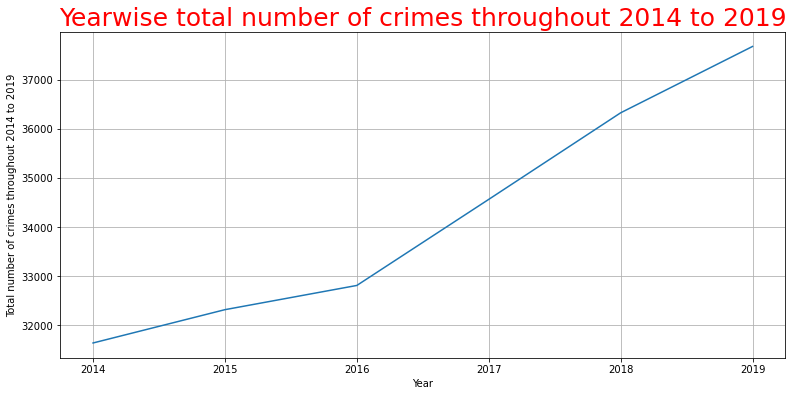

In [5]:

# Creating a Countplot for total numbers of crimes yearwise
df2 = df[df['occurrenceyear'] > 2013] # total crimes per year from 2014 onwards
totalCrimesYearwise = df2.groupby('occurrenceyear').size()
print(totalCrimesYearwise) # printing total number of crimes of each year from 2014 onwards upto 2019

# Plotting graph of each year with total number of crimes
plt.figure(figsize=(13,6))
ct = totalCrimesYearwise.sort_values(ascending=True)
ax = ct.plot.line()
ax.set_xlabel('Year')
ax.set_ylabel('Total number of crimes throughout 2014 to 2019')
ax.set_title('Yearwise total number of crimes throughout 2014 to 2019',color = 'red',fontsize=25)
ax.grid(linestyle='-')
plt.show()

In [6]:
# Printing total crimes based on premisetype
totalCrimesBasedOnPremisetype = df.groupby('premisetype',as_index=False).size()
print(totalCrimesBasedOnPremisetype)

  premisetype   size
0   Apartment  49996
1  Commercial  41081
2       House  37927
3       Other  23178
4     Outside  54253


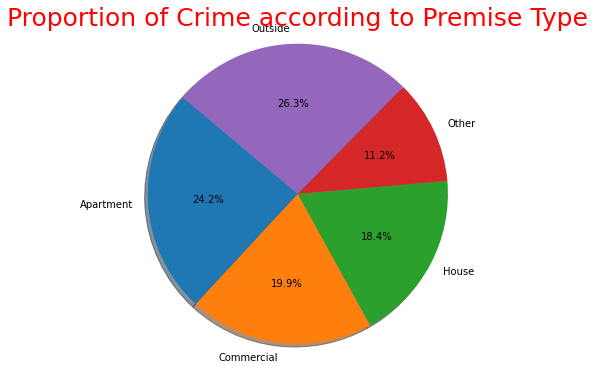

In [7]:
# Displaying proportion of crime according to premisetype on a pie chart
premiseType = df.groupby('premisetype').size()
premiseType.head()
labels = ['Outside','Apartment','Commercial','House','Other']
count = [54253,49996,41081,37927,23178]
labels = ['Apartment','Commercial','House','Other','Outside']
count = [49996,41081,37927,23178,54253]
explode = (0, 0, 0, 0, 0) 

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of Crime according to Premise Type", color='red', fontsize=25)
plt.show()

     occurrencehour              MCI  Total
0                 0          Assault   7222
1                 0       Auto Theft   1530
2                 0  Break and Enter   2968
3                 0          Robbery   1170
4                 0       Theft Over    735
..              ...              ...    ...
115              23          Assault   5558
116              23       Auto Theft   1837
117              23  Break and Enter   1595
118              23          Robbery   1405
119              23       Theft Over    227

[120 rows x 3 columns]


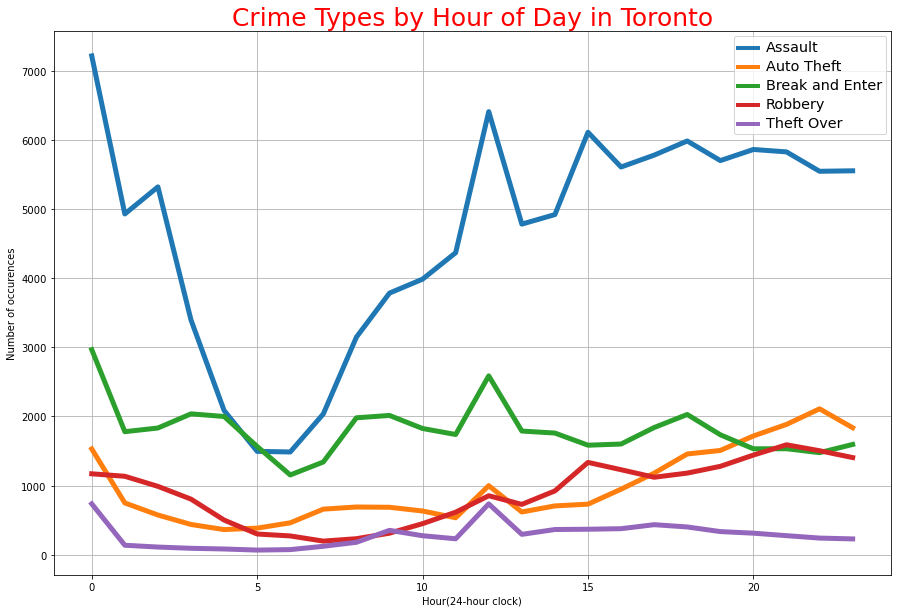

In [8]:
crimesGroupHourwise = df.groupby(['occurrencehour','MCI'],as_index=False).agg({'Total':'sum'})
print(crimesGroupHourwise)

fig, ax = plt.subplots(figsize=(15,10))
crimesGroupHourwise.groupby('MCI').plot(x="occurrencehour", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour(24-hour clock)')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day in Toronto',color = 'red',fontsize=25)
ax.grid(linestyle='-')
leg = plt.legend([v[0] for v in crimesGroupHourwise.groupby('MCI')['MCI']])
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')
plt.show()

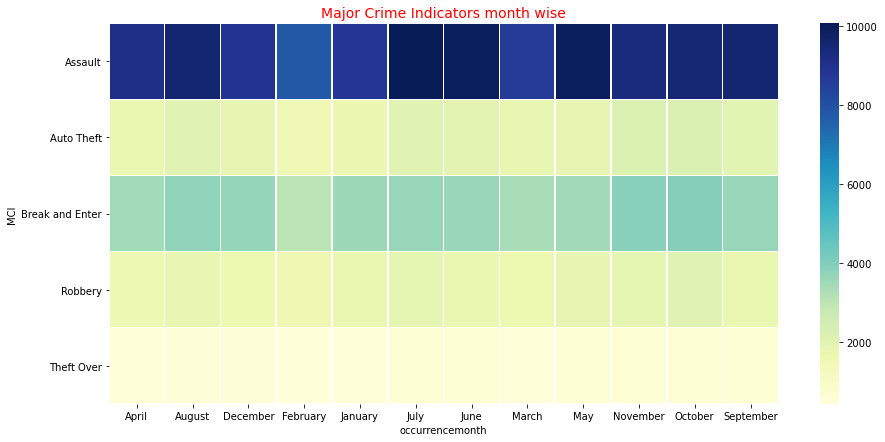

In [9]:

# Plotting heatmap for major crimes
monthwiseMCI = df.groupby(['occurrencemonth','MCI'],as_index=False).agg({'Total':'sum'})

plt.figure(figsize=(15, 7))
crimesCountMonthwise = monthwiseMCI.pivot("MCI","occurrencemonth","Total" )

plt.yticks(rotation=1)
ax = sns.heatmap(crimesCountMonthwise,cmap="YlGnBu", linewidths=.5)
plt.title("Major Crime Indicators month wise",color = 'red',fontsize=14)
plt.show()

In [10]:
# Data preprocessing

# Columns for the models
col_list = ['occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']

# New dataframe from columns
df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1] 


#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1] 

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1] 

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1] 

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1] 

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1] 

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1] 

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1] 

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]


print("sucessfully executed upto here")

sucessfully executed upto here


In [11]:
# Training and testing of dataset
#set X and Y:
X = df2.drop(['MCI'],axis=1).values
y = df2['MCI'].values

#split the data into train and test sets for numeric encoded dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

#need to OneHotEncode all the X variables for input into the classification model:
binary_encoder = OneHotEncoder(sparse=False,categories='auto')
encoded_X = binary_encoder.fit_transform(X)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)

print("sucessfully executed upto here")

sucessfully executed upto here


In [29]:
# Calculating accuracy using Logistic Regression
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

logmodel.fit(X_train,y_train)

y_predict = logmodel.predict(X_test)
accuracy = (logmodel.score(X_test,y_test)) * 100
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))
print("Accuracy of Logistic Regression : ",accuracy)

                 precision    recall  f1-score   support

        Assault       0.54      1.00      0.70     27741
Break and Enter       0.00      0.00      0.00     10700
        Robbery       0.00      0.00      0.00      5360
     Theft Over       0.00      0.00      0.00      1679
     Auto Theft       0.00      0.00      0.00      5851

       accuracy                           0.54     51331
      macro avg       0.11      0.20      0.14     51331
   weighted avg       0.29      0.54      0.38     51331

Accuracy of Logistic Regression :  54.04336560752762


C:\Users\Santosh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
y_predict = logmodel.predict(X_test)
accuracy = (logmodel.score(X_test,y_test)) * 100
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))
print("Accuracy of Logistic Regression : ",accuracy)


                 precision    recall  f1-score   support

        Assault       0.54      1.00      0.70     27741
Break and Enter       0.00      0.00      0.00     10700
        Robbery       0.00      0.00      0.00      5360
     Theft Over       0.00      0.00      0.00      1679
     Auto Theft       0.00      0.00      0.00      5851

       accuracy                           0.54     51331
      macro avg       0.11      0.20      0.14     51331
   weighted avg       0.29      0.54      0.38     51331

Accuracy of Logistic Regression :  54.04336560752762


C:\Users\Santosh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Numeric Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyRandomForest = accuracy_score(y_test, y_pred) * 100
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))
print("Accuracy of Random Forest : ",accuracyRandomForest)

                 precision    recall  f1-score   support

        Assault       0.66      0.86      0.75     27741
Break and Enter       0.58      0.47      0.52     10700
        Robbery       0.63      0.32      0.43      5360
     Theft Over       0.14      0.02      0.03      1679
     Auto Theft       0.55      0.33      0.41      5851

       accuracy                           0.64     51331
      macro avg       0.51      0.40      0.43     51331
   weighted avg       0.61      0.64      0.60     51331

Accuracy of Random Forest :  63.52691356100601


In [15]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [16]:
# displaying the dataset file again before applying FPGrowth algorithm
# and before generating association rules
df # as df contains the dataframe of our datasetfile(MCI_2014_to_2019.csv)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206430,-79.563538,43.682293,205896,GO-2019336030,2019-02-21T23:00:00.000Z,2019-02-22T13:27:00.000Z,Outside,2135,210,Theft Of Motor Vehicle,...,Thursday,23,Auto Theft,D23,7,Willowridge-Martingrove-Richview (7),-79.563538,43.682293,205996,1
206431,-79.348709,43.656227,205897,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2135,210,Theft Of Motor Vehicle,...,Thursday,0,Auto Theft,D55,70,South Riverdale (70),-79.348709,43.656227,205997,1
206432,-79.598869,43.743992,205898,GO-2019187512,2019-01-30T12:30:00.000Z,2019-01-30T12:47:00.000Z,House,2135,210,Theft Of Motor Vehicle,...,Wednesday,12,Auto Theft,D23,1,West Humber-Clairville (1),-79.598869,43.743992,205998,1
206433,-79.348709,43.656227,205899,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2135,210,Theft Of Motor Vehicle,...,Thursday,0,Auto Theft,D55,70,South Riverdale (70),-79.348709,43.656227,205999,1


In [17]:
data = pd.read_csv("MCI_2014_to_2019.csv",header=None)
data

C:\Users\Santosh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,7,8,10,12,13,15,16,18,19,21,24,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
1,-79.4052277,43.6569824,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,352,Friday,3,Assault,D14,79,University (79),-79.4052277,43.6569824,7001
2,-79.3079071,43.7787323,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,227,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.3079071,43.7787323,7002
3,-79.225029,43.7659416,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,228,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.7659416,7003
4,-79.140823400000016,43.7786484,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,330,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.1408234,43.7786484,7004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206431,-79.5635,43.6823,205896,GO-2019336030,2019-02-21T23:00:00.000Z,2019-02-22T13:27:00.000Z,Outside,2135,210,Theft Of Motor Vehicle,...,52,Thursday,23,Auto Theft,D23,7,Willowridge-Martingrove-Richview (7),-79.5635,43.6823,205996
206432,-79.3487,43.6562,205897,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2135,210,Theft Of Motor Vehicle,...,52,Thursday,0,Auto Theft,D55,70,South Riverdale (70),-79.3487,43.6562,205997
206433,-79.5989,43.744,205898,GO-2019187512,2019-01-30T12:30:00.000Z,2019-01-30T12:47:00.000Z,House,2135,210,Theft Of Motor Vehicle,...,30,Wednesday,12,Auto Theft,D23,1,West Humber-Clairville (1),-79.5989,43.744,205998
206434,-79.3487,43.6562,205899,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2135,210,Theft Of Motor Vehicle,...,52,Thursday,0,Auto Theft,D55,70,South Riverdale (70),-79.3487,43.6562,205999


In [18]:
# finding patterns in only 3 columns i.e premisetype,MCI and neighbourhood and deleting rest of the columns
data.drop([0,1,2,3,4,5, 7,8,9,10,11, 12,13,14,15,16,17,18,19,20,21, 23,24, 26,27,28],axis=1, inplace=True)
data.shape

data

,6,22,25
0,premisetype,MCI,Neighbourhood
1,Commercial,Assault,University (79)
2,Commercial,Assault,Tam O'Shanter-Sullivan (118)
3,Apartment,Break and Enter,Woburn (137)
4,Other,Break and Enter,Centennial Scarborough (133)
...,...,...,...
206431,Outside,Auto Theft,Willowridge-Martingrove-Richview (7)
206432,Commercial,Auto Theft,South Riverdale (70)
206433,House,Auto Theft,West Humber-Clairville (1)
206434,Commercial,Auto Theft,South Riverdale (70)


In [19]:
# transforming data into array format 
trans=[]
for i in range(0,20):
    trans.append([str(data.values[i,j]) for j in range(0,3)])
    
trans=np.array(trans)

trans.shape

(20, 3)

In [20]:
# Transforming data into readble format for machine 
t=TransactionEncoder()
data=t.fit_transform(trans)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

(20, 26)

In [21]:
data.head()

,Apartment,Assault,Bay Street Corridor (76),Bedford Park-Nortown (39),Break and Enter,Broadview North (57),Centennial Scarborough (133),Commercial,Downsview-Roding-CFB (26),Eglinton East (138),...,Outside,Robbery,Tam O'Shanter-Sullivan (118),Taylor-Massey (61),Thistletown-Beaumond Heights (3),University (79),Waterfront Communities-The Island (77),West Humber-Clairville (1),Woburn (137),premisetype
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[Text(0, 0, 'Assault'),
 Text(1, 0, 'Outside'),
 Text(2, 0, 'Break and Enter'),
 Text(3, 0, 'Commercial'),
 Text(4, 0, 'Bay Street Corridor (76)')]

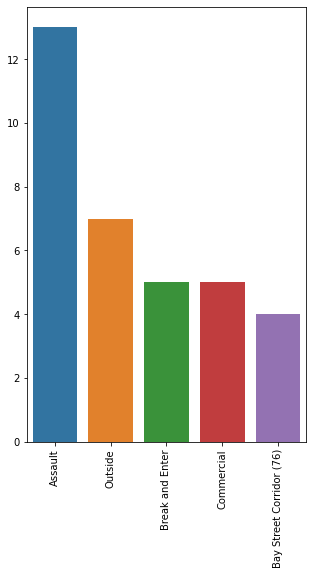

In [22]:
r=data.sum(axis=0).sort_values(ascending=False)[:5]

plt.figure(figsize=(5,8))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

(0.0, 100.0, 0.0, 100.0)

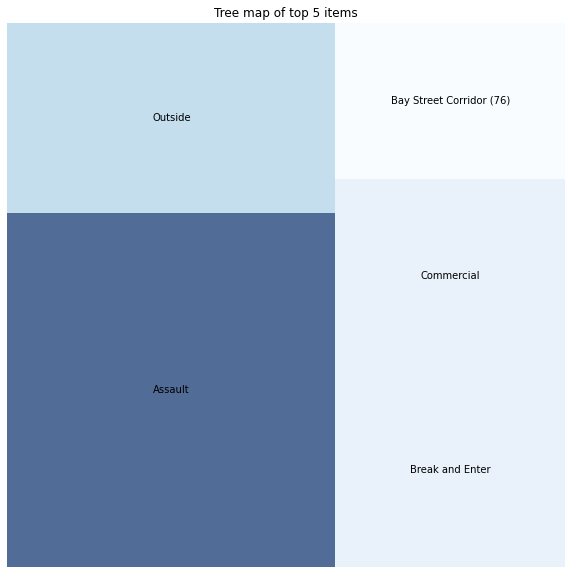

In [23]:
my_values=r.values
cmap= matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm=matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors= [cmap(norm(value)) for value in my_values]

plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values,label=r.index,alpha=.7, color=colors)
plt.title("Tree map of top 5 items")
plt.axis("off")

In [24]:
# Finding frequent itemsets using FPGrowth algorithm, with minimum support value 0.1
res=fpgrowth(data,min_support=0.1,use_colnames=True)
res

,support,itemsets
0,0.65,(Assault)
1,0.25,(Commercial)
2,0.25,(Break and Enter)
3,0.10,(Woburn (137))
4,0.10,(Apartment)
5,0.15,(Other)
6,0.35,(Outside)
7,0.20,(Bay Street Corridor (76))
8,0.10,(House)
9,0.25,"(Assault, Commercial)"


In [25]:
# Generating association rules
res=association_rules(res,metric="lift",min_threshold=1)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Assault),(Commercial),0.65,0.25,0.25,0.384615,1.538462,0.0875,1.218750
1,(Commercial),(Assault),0.25,0.65,0.25,1.000000,1.538462,0.0875,inf
2,(Break and Enter),(Woburn (137)),0.25,0.10,0.10,0.400000,4.000000,0.0750,1.500000
3,(Woburn (137)),(Break and Enter),0.10,0.25,0.10,1.000000,4.000000,0.0750,inf
4,(Break and Enter),(Apartment),0.25,0.10,0.10,0.400000,4.000000,0.0750,1.500000
5,(Apartment),(Break and Enter),0.10,0.25,0.10,1.000000,4.000000,0.0750,inf
6,(Assault),(Other),0.65,0.15,0.10,0.153846,1.025641,0.0025,1.004545
7,(Other),(Assault),0.15,0.65,0.10,0.666667,1.025641,0.0025,1.050000
8,(Assault),(Outside),0.65,0.35,0.30,0.461538,1.318681,0.0725,1.207143
9,(Outside),(Assault),0.35,0.65,0.30,0.857143,1.318681,0.0725,2.450000


In [26]:
df2 = res[res['consequent support'] > 0.3]
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Commercial),(Assault),0.25,0.65,0.25,1.000000,1.538462,0.0875,inf
7,(Other),(Assault),0.15,0.65,0.10,0.666667,1.025641,0.0025,1.050000
8,(Assault),(Outside),0.65,0.35,0.30,0.461538,1.318681,0.0725,1.207143
9,(Outside),(Assault),0.35,0.65,0.30,0.857143,1.318681,0.0725,2.450000
10,(Bay Street Corridor (76)),(Outside),0.20,0.35,0.20,1.000000,2.857143,0.1300,inf
13,(Bay Street Corridor (76)),(Assault),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000
14,"(Assault, Bay Street Corridor (76))",(Outside),0.15,0.35,0.15,1.000000,2.857143,0.0975,inf
16,"(Bay Street Corridor (76), Outside)",(Assault),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000


In [27]:
# saving the final result in a file of format .csv with name as Final Result.csv
temp = pd.DataFrame(res)
temp.to_csv("Final Result.csv")
print(" \"Final Result.csv\" file saved successfully...")

 "Final Result.csv" file saved successfully...
